In [18]:
#Documentation : http://docs.scipy.org/doc/scipy/reference/sparse.html
"""
Sparse matrices can be used in arithmetic operations: they support addition, subtraction, multiplication, division, and matrix power.
Advantages of the CSR format

        efficient arithmetic operations CSR + CSR, CSR * CSR, etc.
        efficient row slicing
        fast matrix vector products
Disadvantages of the CSR format

        slow column slicing operations (consider CSC)
        changes to the sparsity structure are expensive (consider LIL or DOK)
"""
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# SpectralGraphTheory

## Introduction
This notebook intends to show some experimental work about spectral graph theory, and in this case mainly about spectral clustering
We will try to reproduce some of the interesting principle presented in the paper by Andrew Ng (On spectral clustering: Analysis and an algorithm.)

## Graph as matrices
In this notebook we will only be using undirected graphs, whose structure can be represented using an adjacency matrix $A \in \mathbb{R}^{n\times n}$ that can be designed as follow for, $n$ vertices $s_i, i = 0,1,\dots n-1$:
$$
    A_{ij} =
    \begin{cases}
        e^{\frac{\|s_i-s_j\|}{2\sigma^2}},& \text{if } i\neq j\\
        0              & \text{otherwise}
    \end{cases}
$$

For any vertex $s_i$ we define its degree $d_j$ as the sum of the $j^{th}$ row of the matrix $A$.
From this we can also define $D = diag(d_0, d_1,\dots,d_{n-1})$ 

## Laplacian and normalized laplacian

We can define the Laplacian operator , which in our case is also known as "normalized laplacian" L:
$$
    L = D^{-\frac{1}{2}}AD^{-\frac{1}{2}}
$$

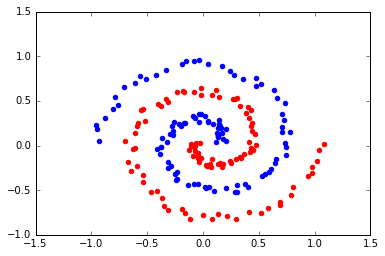

In [60]:
#Let's first define some funny manifold in R2
N = 100
#norm = np.log(np.linspace(np.exp(0.1),np.exp(1),N))
norm = np.linspace(0.1,1,N)
angle = 2*np.pi*np.linspace(0,1,N)*1.5 #we want a loop of 1.5 times the circle
angle2 = 1*np.pi+2*np.pi*np.linspace(0,1,N)*1.5 #we want a loop of 1.5 times the circle

#defines points and add noise
noise = np.random.rand(2,N)*0.1
points=norm*[np.cos(angle),np.sin(angle)]+noise
noise = np.random.rand(2,N)*0.1
points2=norm*[np.cos(angle2),np.sin(angle2)]+noise

#Point cloud
plt.scatter(points[0,:],points[1,:], color='b')
plt.scatter(points2[0,:],points2[1,:], color='r')

In [61]:
#Now we will concatenate those points
points = np.concatenate( (points, points2), axis=1 )

In [67]:
#Threshold: Below this value we consider that vertices are not connected
thresh= 1e-4
#Sigma of the gaussian distance metric
sigma = 4e-1
sigmaSquare = sigma**2
#will contain the value of the edges
data=[]
rowIdx=[]
colIdx=[]

data.append(0.5)
rowIdx.append(1)
colIdx.append(2)

#Now we are going to fill the graph matrix, neglecting small terms
#for idxI in range(points.shape[1]):
#    for idxJ in range(idxI,points.shape[1]):
#        dist = np.exp(np.linalg.norm(points[:,idxI]-points[:,idxJ])**2/(2*sigmaSquare))
#        data.append(dist)
#        data.append(dist)
#        rowIdx.append(idxI)
#        rowIdx.append(idxJ)
#        colIdx.append(idxI)
#        colIdx.append(idxJ)

#Practical implementation using scipy support for sparse matrices
A = csr_matrix(np.array(data), (np.array(rowIdx), np.array(colIdx)), dtype=np.float)

NotImplementedError: Reshaping not implemented for csr_matrix.

## References

Book :
Lectures on Spectral Graph Theory by FanR.K.Chung: http://www.math.ucsd.edu/~fan/cbms.pdf

Article:
Ng, A. Y., Jordan, M. I., & Weiss, Y. (2002). On spectral clustering: Analysis and an algorithm. Advances in neural information processing systems, 2, 849-856.
http://ai.stanford.edu/~ang/papers/nips01-spectral.pdf